<i><b>Question 2

Learn the following models on XOR dataset (refer to Tensorflow Playground and generate the dataset on your own containing 200 training instances and 200 test instances) such that all these models achieve similar results (good). The definition of good is left subjective – but you would expect the classifier to capture the shape of the XOR function. <i>

In [ ]:
import os
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


<i><b>XOR Dataset </b>

x is a 2d array of shape (400, 2), meaning there are 400 points, each with two features (X1 and X2).Each feature is randomly drawn from a uniform distribution in the range [-4, 4].
sign function is applied to data points which gives the sign of the first feature (X1), and does the same for the second feature (X2), where the sign function returns -1 for negative values, 0 for zero, and 1 for positive values.
These signs are converted to integers and then combined with a bitwise XOR operation. XOR returns 1 if the signs differ ((-1, 1) or (1, -1)) and 0 if they are the same ((1, 1) or (-1, -1)).

</i>



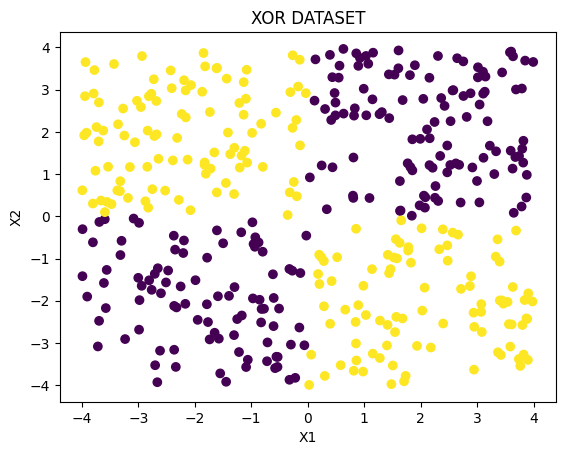

In [ ]:
x = np.random.uniform(low=-4, high=4, size=(400,2))
y = np.bitwise_xor(np.sign(x[:,0]).astype(int),np.sign(x[:,1]).astype(int))
y[y==-2]=1
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("XOR DATASET")
plt.show()


Splitting 200 data points  for training and 200 data points for testing.

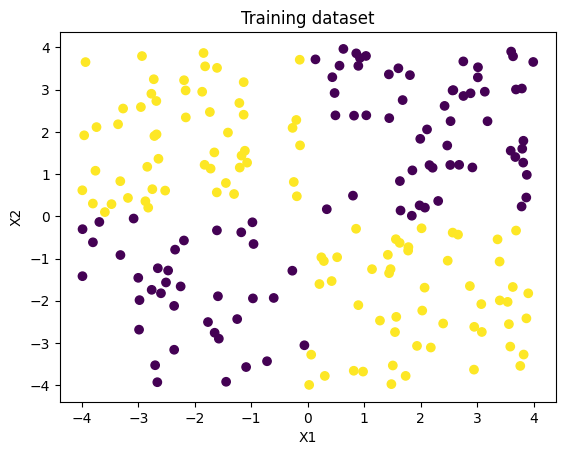

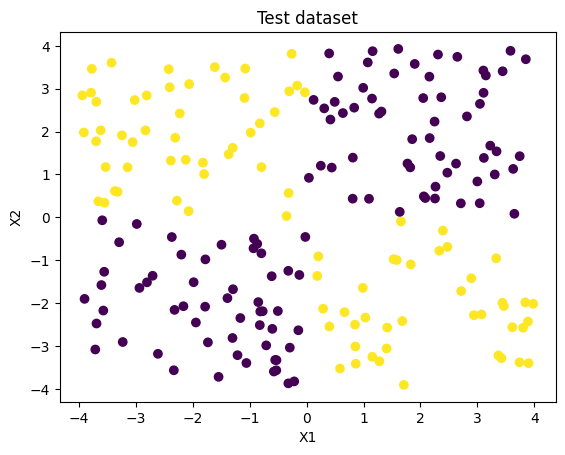

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Training dataset")
plt.show()

plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Test dataset")
plt.show()


<i>
$$
{\text{BCE Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]}
$$

</i>

In [ ]:
def train_model(model,X_train,Y_train,X_test,Y_test,title):
  loss_fn = nn.BCELoss()
  opt = torch.optim.AdamW(model.parameters(), lr=0.01)
  # Mini-batch training
  print_every = 100
  for epoch in range(10000):
      y_pred = model(X_train)
      loss = loss_fn(y_pred, Y_train)
      loss.backward()
      opt.step()
      opt.zero_grad()
      with torch.no_grad():
            predicted_classes = (y_pred > 0.5).float()
            accuracy = (predicted_classes == Y_train).float().mean().item() * 100

      if epoch % print_every == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

  X = np.linspace(-4, 4, 300)
  Y = np.linspace(-4, 4, 300)
  X, Y = np.meshgrid(X, Y)
  X_=np.c_[X.ravel(),Y.ravel()]
  X__=torch.tensor(X_,dtype=torch.float32).to(device)
  y_pred=model(X__).reshape(X.shape)
  y_pred_sig=torch.sigmoid(y_pred)
  plt.figure(figsize=(8, 6))
  plt.contourf(X, Y, y_pred.detach().numpy(), cmap='coolwarm', alpha=0.5)
  plt.scatter(X_test.detach().numpy()[:,0],X_test.detach().numpy()[:,1],c=Y_test.detach().numpy(),cmap='coolwarm')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(title)
  plt.colorbar(label='Prediction')
  plt.show()



<b><i>(a) MLP</i></b>

Epoch 0, Loss: 0.6641, Accuracy: 64.00%
Epoch 100, Loss: 0.2098, Accuracy: 96.50%
Epoch 200, Loss: 0.1044, Accuracy: 97.50%
Epoch 300, Loss: 0.0647, Accuracy: 98.50%
Epoch 400, Loss: 0.0450, Accuracy: 99.50%
Epoch 500, Loss: 0.0290, Accuracy: 99.50%
Epoch 600, Loss: 0.0219, Accuracy: 100.00%
Epoch 700, Loss: 0.0170, Accuracy: 100.00%
Epoch 800, Loss: 0.0140, Accuracy: 100.00%
Epoch 900, Loss: 0.0101, Accuracy: 100.00%
Epoch 1000, Loss: 0.0084, Accuracy: 100.00%
Epoch 1100, Loss: 0.0071, Accuracy: 100.00%
Epoch 1200, Loss: 0.0061, Accuracy: 100.00%
Epoch 1300, Loss: 0.0053, Accuracy: 100.00%
Epoch 1400, Loss: 0.0046, Accuracy: 100.00%
Epoch 1500, Loss: 0.0041, Accuracy: 100.00%
Epoch 1600, Loss: 0.0037, Accuracy: 100.00%
Epoch 1700, Loss: 0.0033, Accuracy: 100.00%
Epoch 1800, Loss: 0.0030, Accuracy: 100.00%
Epoch 1900, Loss: 0.0028, Accuracy: 100.00%
Epoch 2000, Loss: 0.0025, Accuracy: 100.00%
Epoch 2100, Loss: 0.0023, Accuracy: 100.00%
Epoch 2200, Loss: 0.0022, Accuracy: 100.00%
Epoch 

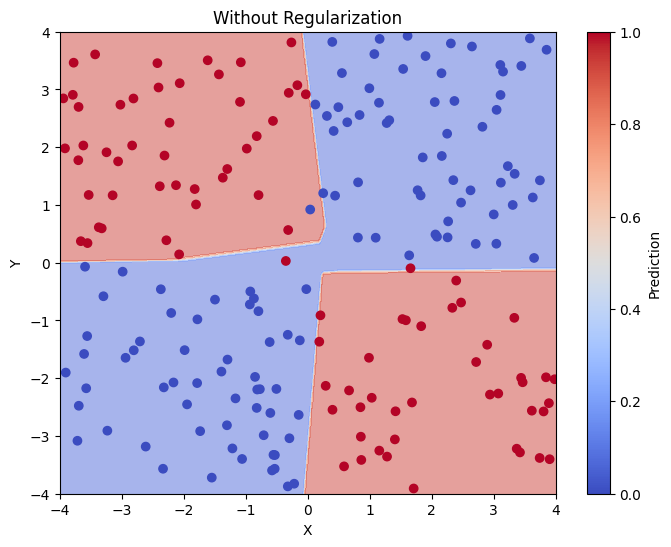

In [ ]:
model_mlp = nn.Sequential(nn.Linear(2, 4), nn.ReLU(),nn.Linear(4,2), nn.ReLU(), nn.Linear(2,1),nn.Sigmoid())
model_mlp.to(device)
X_train=torch.tensor(x_train,dtype=torch.float32).to(device)
X_test=torch.tensor(x_test,dtype=torch.float32).to(device)
Y_train=torch.tensor(y_train,dtype=torch.float32).to(device)
Y_train=torch.unsqueeze(Y_train,dim=1)
Y_test=torch.tensor(y_test,dtype=torch.float32).to(device)
Y_test=torch.unsqueeze(Y_test,dim=1)
train_model(model_mlp,X_train,Y_train,X_test,Y_test,"Without Regularization")

$$
{L1 Loss:-
\text{L1 Loss} = \sum_{i} |w_i|}
$$

$$
{L2 Loss-
\text{L2 Loss} = \sum_{i} w_i^2}
$$




In [ ]:
def compute_l1_loss(w):
      return torch.abs(w).sum()

def compute_l2_loss(w):
      return torch.square(w).sum()

<b><i>Training the mlp models</i></b>

In [ ]:

def train_model_Reg(model,X_train,Y_train,X_test,Y_test,isL1,title,l1_weight,l2_weight):
  loss_fn = nn.BCELoss()
  opt = torch.optim.AdamW(model.parameters(), lr=0.01)
  # Mini-batch training
  print_every = 100
  for epoch in range(10000):
      y_pred = model(X_train)
      loss = loss_fn(y_pred, Y_train)

      # Compute L1 and L2 loss component
      parameters = []
      for parameter in model.parameters():
          parameters.append(parameter.view(-1))

      penalty_loss=0

      if isL1:
          penalty_loss = l1_weight * compute_l1_loss(torch.cat(parameters))
      else:
          penalty_loss = l2_weight * compute_l2_loss(torch.cat(parameters))

      # Add L1 and L2 loss components
      loss+=penalty_loss
      loss.backward()
      opt.step()
      opt.zero_grad()
# Calculate accuracy
      with torch.no_grad():
            predicted_classes = (y_pred > 0.5).float()
            accuracy = (predicted_classes == Y_train).float().mean().item() * 100

      if epoch % print_every == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Accuracy = {accuracy:.2f}%")
  X = np.linspace(-4, 4, 300)
  Y = np.linspace(-4, 4, 300)
  X, Y = np.meshgrid(X, Y)
  X_=np.c_[X.ravel(),Y.ravel()]
  X__=torch.tensor(X_,dtype=torch.float32).to(device)
  y_pred=model(X__).reshape(X.shape)
  y_pred_sig=torch.sigmoid(y_pred)
  plt.figure(figsize=(8, 6))
  plt.contourf(X, Y, y_pred.detach().numpy(), cmap='coolwarm', alpha=0.5)
  plt.scatter(X_test.detach().numpy()[:,0],X_test.detach().numpy()[:,1],c=Y_test.detach().numpy(),cmap='coolwarm')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(title)
  plt.colorbar(label='Prediction')
  #plt.grid(True)
  plt.show()


<b><i>Taking best L1 and L2 coeffients values</i></b>

In [ ]:
def train_and_validate(model,x_train,x_valid,y_train,y_valid,isL1,l1,l2):
  loss_fn = nn.BCELoss()
  opt = torch.optim.AdamW(model.parameters(), lr=0.01)
  X_train=torch.tensor(x_train,dtype=torch.float32).to(device)
  X_valid=torch.tensor(x_valid,dtype=torch.float32).to(device)
  Y_train=torch.tensor(y_train,dtype=torch.float32).to(device)
  Y_valid=torch.tensor(y_valid,dtype=torch.float32).to(device)
  Y_train=torch.unsqueeze(Y_train,dim=1)
  Y_valid=torch.unsqueeze(Y_valid,dim=1)
  for epoch in range(10000):
      y_pred = model(X_train)
      #print(y_pred)
      #loss=F.binary_cross_entropy(y_pred,Y_test)
      loss = loss_fn(y_pred, Y_train)


      # Compute L1 and L2 loss component
      parameters = []
      for parameter in model.parameters():
          parameters.append(parameter.view(-1))

      penalty_loss=0

      if isL1:
          penalty_loss = l1 * compute_l1_loss(torch.cat(parameters))
      else:
          penalty_loss = l2 * compute_l2_loss(torch.cat(parameters))
      loss+=penalty_loss
      loss.backward()
      opt.step()
      opt.zero_grad()

  model.eval()  # Switch to evaluation mode
  val_loss = 0
  with torch.no_grad():
      outputs=model(X_valid)
      val_loss = loss_fn(outputs, Y_valid)
  return val_loss




<b><i> (b) MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)
</i>

Best L1 coefficient

In [ ]:
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
L1=L2 = np.linspace(0.0001, 0.001, 10)


best_val_loss = float('inf')
best_l1_coefficient = None
for l in L1:
  model = nn.Sequential(nn.Linear(2, 4), nn.ReLU(),nn.Linear(4,2), nn.ReLU(), nn.Linear(2,1),nn.Sigmoid())
  loss=train_and_validate(model,x_train1,x_valid,y_train1,y_valid,True,l1=l,l2=0.001)
  if loss<best_val_loss:
    best_val_loss=loss
    best_l1_coefficient = l
print("Best L1 coefficient value:",best_l1_coefficient)


Best L1 coefficient value: 0.0003


<b><i>MLP with L1 regularization.
</i>

Epoch 0: Loss = 0.6767, Accuracy = 52.50%
Epoch 100: Loss = 0.5030, Accuracy = 73.00%
Epoch 200: Loss = 0.4962, Accuracy = 73.00%
Epoch 300: Loss = 0.4940, Accuracy = 73.50%
Epoch 400: Loss = 0.4923, Accuracy = 73.50%
Epoch 500: Loss = 0.4916, Accuracy = 73.50%
Epoch 600: Loss = 0.4914, Accuracy = 73.50%
Epoch 700: Loss = 0.4912, Accuracy = 73.50%
Epoch 800: Loss = 0.4910, Accuracy = 73.50%
Epoch 900: Loss = 0.4909, Accuracy = 73.50%
Epoch 1000: Loss = 0.4910, Accuracy = 73.50%
Epoch 1100: Loss = 0.4908, Accuracy = 73.50%
Epoch 1200: Loss = 0.4908, Accuracy = 73.50%
Epoch 1300: Loss = 0.4908, Accuracy = 73.50%
Epoch 1400: Loss = 0.4907, Accuracy = 73.50%
Epoch 1500: Loss = 0.4906, Accuracy = 73.50%
Epoch 1600: Loss = 0.4905, Accuracy = 73.50%
Epoch 1700: Loss = 0.4905, Accuracy = 73.50%
Epoch 1800: Loss = 0.4903, Accuracy = 73.50%
Epoch 1900: Loss = 0.4903, Accuracy = 73.50%
Epoch 2000: Loss = 0.4902, Accuracy = 73.50%
Epoch 2100: Loss = 0.4902, Accuracy = 73.50%
Epoch 2200: Loss = 0.4

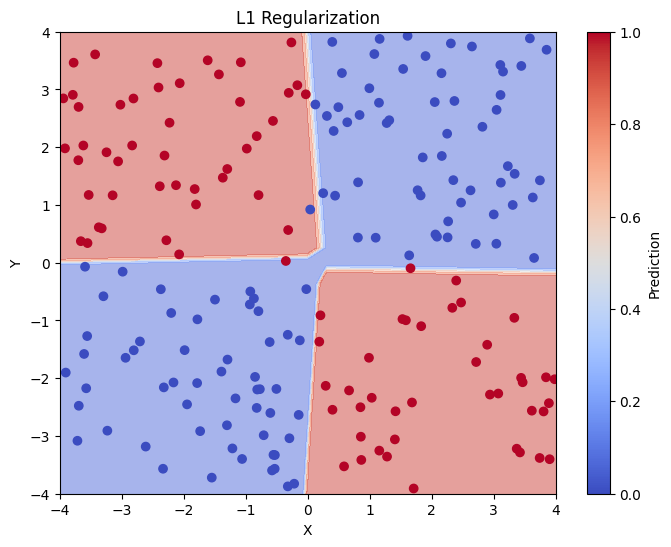

In [ ]:
model_L1 = nn.Sequential(nn.Linear(2, 4), nn.ReLU(),nn.Linear(4,2), nn.ReLU(), nn.Linear(2,1),nn.Sigmoid())
model_L1.to(device)
X_train=torch.tensor(x_train,dtype=torch.float32).to(device)
X_test=torch.tensor(x_test,dtype=torch.float32).to(device)
Y_train=torch.tensor(y_train,dtype=torch.float32).to(device)
Y_train=torch.unsqueeze(Y_train,dim=1)
Y_test=torch.tensor(y_test,dtype=torch.float32).to(device)
Y_test=torch.unsqueeze(Y_test,dim=1)
train_model_Reg(model_L1,X_train,Y_train,X_test,Y_test,True,"L1 Regularization",l1_weight=best_l1_coefficient,l2_weight=0.7)

<b><i> (c) MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)</i></b>

<b><i>Calculating best L2 Coefficient</i></b>

In [ ]:
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
L2 = np.linspace(0.0001, 0.001, 10)

best_val_loss = float('inf')
best_l2_coefficient = None
for l in L2:
  model = nn.Sequential(nn.Linear(2, 4), nn.ReLU(),nn.Linear(4,2), nn.ReLU(), nn.Linear(2,1),nn.Sigmoid())
  loss=train_and_validate(model,x_train1,x_valid,y_train1,y_valid,True,l1=0.001,l2=l)
  if loss<best_val_loss:
    best_val_loss=loss
    best_l2_coefficient = l
print("Best L2 Coefficient Value:",best_l2_coefficient)

Best L2 Coefficient Value: 0.001


<b><i>MLP with L2 Regularization</i>

Epoch 0: Loss = 0.7295, Accuracy = 31.50%
Epoch 100: Loss = 0.2845, Accuracy = 94.50%
Epoch 200: Loss = 0.1403, Accuracy = 98.00%
Epoch 300: Loss = 0.1092, Accuracy = 99.50%
Epoch 400: Loss = 0.1006, Accuracy = 99.50%
Epoch 500: Loss = 0.0975, Accuracy = 99.50%
Epoch 600: Loss = 0.0960, Accuracy = 99.50%
Epoch 700: Loss = 0.0952, Accuracy = 99.50%
Epoch 800: Loss = 0.0947, Accuracy = 99.50%
Epoch 900: Loss = 0.0943, Accuracy = 99.50%
Epoch 1000: Loss = 0.0940, Accuracy = 99.50%
Epoch 1100: Loss = 0.0938, Accuracy = 100.00%
Epoch 1200: Loss = 0.0936, Accuracy = 100.00%
Epoch 1300: Loss = 0.0935, Accuracy = 99.50%
Epoch 1400: Loss = 0.0933, Accuracy = 99.50%
Epoch 1500: Loss = 0.0932, Accuracy = 99.50%
Epoch 1600: Loss = 0.0932, Accuracy = 99.50%
Epoch 1700: Loss = 0.0931, Accuracy = 100.00%
Epoch 1800: Loss = 0.0931, Accuracy = 100.00%
Epoch 1900: Loss = 0.0930, Accuracy = 100.00%
Epoch 2000: Loss = 0.0930, Accuracy = 100.00%
Epoch 2100: Loss = 0.0930, Accuracy = 100.00%
Epoch 2200: Los

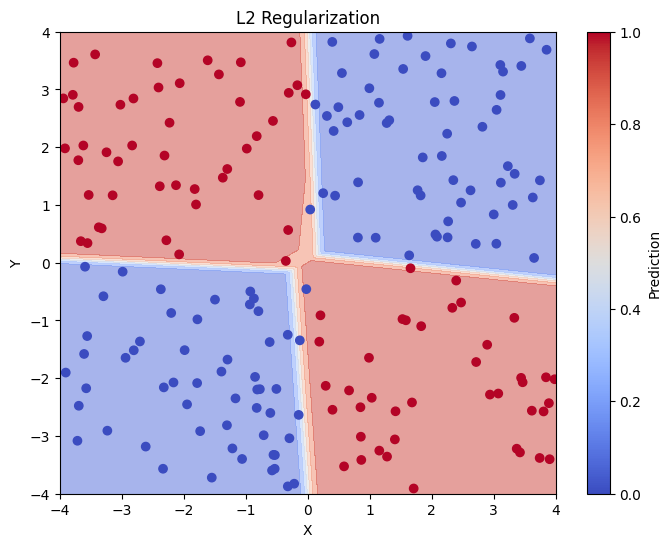

In [ ]:
model_L2 = nn.Sequential(nn.Linear(2, 4), nn.ReLU(),nn.Linear(4,2), nn.ReLU(), nn.Linear(2,1),nn.Sigmoid())
model_L2.to(device)
X_train=torch.tensor(x_train,dtype=torch.float32).to(device)
X_test=torch.tensor(x_test,dtype=torch.float32).to(device)
Y_train=torch.tensor(y_train,dtype=torch.float32).to(device)
Y_train=torch.unsqueeze(Y_train,dim=1)
Y_test=torch.tensor(y_test,dtype=torch.float32).to(device)
Y_test=torch.unsqueeze(Y_test,dim=1)
train_model_Reg(model_L2,X_train,Y_train,X_test,Y_test,False,"L2 Regularization",l1_weight=0.001,l2_weight=best_l2_coefficient)

<b><i> (d) learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.)</i></b>

In [ ]:

def train_model_logistic(model,X_train,Y_train,X_test,Y_test,title):
  loss_fn = nn.BCELoss()
  opt = torch.optim.AdamW(model.parameters(), lr=0.01)
  # Mini-batch training
  print_every = 100
  for epoch in range(10000):
      y_pred = model(X_train)
      loss = loss_fn(y_pred, Y_train)
      loss.backward()
      opt.step()
      opt.zero_grad()
      if epoch % print_every == 0:
          print(epoch, loss.item())
  X = np.linspace(-4, 4, 300)
  Y = np.linspace(-4, 4, 300)
  X, Y = np.meshgrid(X, Y)
  X_=np.c_[X.ravel(),Y.ravel(),X.ravel()[:]*Y.ravel()[:]]
  X__=torch.tensor(X_,dtype=torch.float32).to(device)
  y_pred=model(X__).reshape(X.shape)
  #y_pred_sig=torch.sigmoid(y_pred)
  plt.figure(figsize=(8, 6))
  plt.contourf(X, Y, y_pred.detach().numpy(), cmap='coolwarm', alpha=0.5)
  plt.scatter(X_test.detach().numpy()[:,0],X_test.detach().numpy()[:,1],c=Y_test.detach().numpy(),cmap='coolwarm')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(title)
  plt.colorbar(label='Prediction')
  plt.show()


Epoch 0, Loss: 0.6582, Accuracy: 67.00%
Epoch 100, Loss: 0.1439, Accuracy: 97.00%
Epoch 200, Loss: 0.1148, Accuracy: 97.50%
Epoch 300, Loss: 0.0983, Accuracy: 97.50%
Epoch 400, Loss: 0.0873, Accuracy: 98.00%
Epoch 500, Loss: 0.0791, Accuracy: 98.50%
Epoch 600, Loss: 0.0728, Accuracy: 100.00%
Epoch 700, Loss: 0.0676, Accuracy: 100.00%
Epoch 800, Loss: 0.0633, Accuracy: 100.00%
Epoch 900, Loss: 0.0596, Accuracy: 100.00%
Epoch 1000, Loss: 0.0565, Accuracy: 100.00%
Epoch 1100, Loss: 0.0537, Accuracy: 100.00%
Epoch 1200, Loss: 0.0512, Accuracy: 100.00%
Epoch 1300, Loss: 0.0489, Accuracy: 100.00%
Epoch 1400, Loss: 0.0469, Accuracy: 100.00%
Epoch 1500, Loss: 0.0451, Accuracy: 100.00%
Epoch 1600, Loss: 0.0434, Accuracy: 100.00%
Epoch 1700, Loss: 0.0418, Accuracy: 100.00%
Epoch 1800, Loss: 0.0403, Accuracy: 100.00%
Epoch 1900, Loss: 0.0390, Accuracy: 100.00%
Epoch 2000, Loss: 0.0377, Accuracy: 100.00%
Epoch 2100, Loss: 0.0365, Accuracy: 100.00%
Epoch 2200, Loss: 0.0354, Accuracy: 100.00%
Epoch 

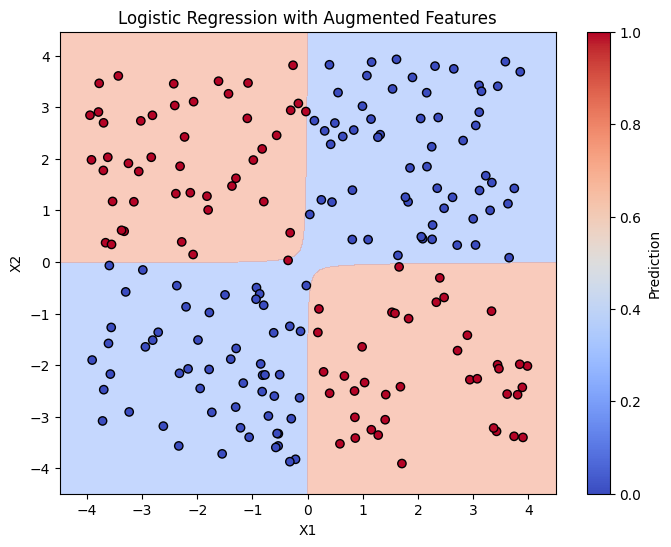

In [ ]:

# Feature augmentation function
def augment_features(X):
    x1, x2 = X[:, 0], X[:, 1]
    interaction_term = x1 * x2
    squared_term = x1*2 + x2*2
    return np.column_stack((x1, x2, interaction_term, squared_term))

# Prepare augmented features for training and testing
x_train_aug = augment_features(x_train)
x_test_aug = augment_features(x_test)


X_train = torch.tensor(x_train_aug, dtype=torch.float32).to(device)
X_test_log = torch.tensor(x_test_aug, dtype=torch.float32).to(device)
Y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
Y_test_log = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

model_Log = nn.Sequential(nn.Linear(4, 1), nn.Sigmoid()).to(device)


def train_model_logistic(model, X_train, Y_train, X_test, Y_test, title):
    loss_fn = nn.BCELoss()
    opt = torch.optim.AdamW(model.parameters(), lr=0.01)
    print_every = 100
    for epoch in range(10000):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, Y_train)
        loss.backward()
        opt.step()
        opt.zero_grad()
        with torch.no_grad():
            predicted_classes = (y_pred > 0.5).float()
            accuracy = (predicted_classes == Y_train).float().mean().item() * 100

        if epoch % print_every == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

    x_min, x_max = X_train[:, 0].min().item() - 0.5, X_train[:, 0].max().item() + 0.5
    y_min, y_max = X_train[:, 1].min().item() - 0.5, X_train[:, 1].max().item() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_aug = augment_features(grid)
    grid_aug_torch = torch.tensor(grid_aug, dtype=torch.float32).to(device)

    with torch.no_grad():
        z = model(grid_aug_torch).reshape(xx.shape).cpu().numpy()


    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.5)
    plt.scatter(X_test.cpu().numpy()[:, 0], X_test.cpu().numpy()[:, 1], c=Y_test.cpu().numpy().ravel(), cmap='coolwarm', edgecolor='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.colorbar(label='Prediction')
    plt.show()

train_model_logistic(model_Log, X_train, Y_train, X_test_log, Y_test_log, "Logistic Regression with Augmented Features")

In [ ]:
models = {
    "MLP without Regularization": model_mlp,
    "MLP with L1 Regularization": model_L1,
    "MLP with L2 Regularization": model_L2,
    "Logistic Regression with Polynomial Features": model_Log
}



x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
x_test_aug_tensor = torch.tensor(X_test_log, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


accuracies = {}
for name, model in models.items():
    model.eval()

    with torch.no_grad():
        if name == "Logistic Regression with Polynomial Features":
            y_pred = model(X_test_log)
        else:
            y_pred = model(x_test_tensor)

        predicted_classes = (y_pred > 0.5).float().squeeze()
        accuracy = (predicted_classes == y_test_tensor).float().mean().item() * 100

    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}%")


MLP without Regularization Accuracy: 98.50%
MLP with L1 Regularization Accuracy: 98.50%
MLP with L2 Regularization Accuracy: 98.50%
Logistic Regression with Polynomial Features Accuracy: 99.50%


C:\Users\Drishti Bhandari\AppData\Local\Temp\ipykernel_29048\442207727.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_aug_tensor = torch.tensor(X_test_log, dtype=torch.float32)


<b><i>Results:
    

    (a) Simple MLP without regularization

    -> We have used 2 hidden layer of size 4 and 2 respectively. Both layers have Relu activation function as non linearity. Output layer has one neuron and sigmoid function is applied to it.

    -> We trained over 10000 epochs with learning rate 0.01. We have got almost perfect decision boundary except 2-3 points are on the boundary line.

    (b) L1 Regularization

    -> Using validation data, We applied different weight coefficients for regularization. So finally ,we used 0.0003 as a weight coefficient.

    -> Due to L1 regularization, weights goes down and some weights becomes completely zero. Due to that some points gives value close to zero at output layer which became 0.5 after applying sigmoid.

    -> So, In L1 regularization, we can see that decision boundary is not very sharp because some points around the boundary predicted value close to 0.5

    (c) L2 Regularization

    -> Using validation data, We applied different weight coefficients for regularization. So finally ,we used 0.01 as a weight coefficient.

    -> Due to L2 regularization, weights goes down and some weights becomes completely zero. Due to that some points gives value close to zero at output layer which became 0.5 after applying sigmoid

    -> So, In L2 regularization, we can see that decision boundary is not perfect as compared of L1 regularization.

    (d) Logistic regression

    -> In this we used (x1*x2) and(x1**2 + x2**2), as extra feature while training.

    -> We trained over 10000 epochs with learning rate 0.01. We have got almost perfect decision boundary except 2-3 points are on the boundary line.


</i></b>